In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import sklearn
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#!pip install cufflinks
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style

from termcolor import colored

     ---------------------------------------- 0.0/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     ----- ---------------------------------- 10.2/81.7 kB ? eta -:--:--
     --------- ---------------------------- 20.5/81.7 kB 110.1 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/81.7 kB 163.8 kB/s eta 0:00:01
     ------------------- ------------------ 41.0/81.7 kB 178.6 kB/s eta 0:00:01
     --------------------------------- ---- 71.7/81.7 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 81.7/81.7 kB 269.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=dcdf7b4723e3c6c3dc81fcaa5019b8050c979ec8c00fd1eba3e27eb964c8b4b6
  Stored in directory: c:\users\alperugurcan\appdata\local\pip\cache\wheels\c0\d9\70\372130dacf508192607c1a7359c7bf0656b1a3

In [12]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [14]:
def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [16]:
df0 = pd.read_excel("World military power.xlsx", header=1)
df = df0.copy()

In [18]:
df0.head(1)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.000


In [20]:
df.head(3)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.344,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.000
1,Albania,2.314,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.000
2,Algeria,0.466,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.000


In [22]:
df.tail(5)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
133,Venezuela,0.645,Venezuela,260,Venezuela,38,Venezuela,0,Venezuela,52,Venezuela,82,Venezuela,86,Venezuela,10,Venezuela,390,Venezuela,600,Venezuela,73,Venezuela,104,Venezuela,36,Venezuela,49.000,Venezuela,0.000,Venezuela,2.000,Venezuela,0.000,Venezuela,4.000,Venezuela,"74,50,00,000",Venezuela,"1,00,30,00,00,000",Venezuela,444,Venezuela,"20,07,000",Venezuela,"5,75,000",Venezuela,"3,00,90,00,00,000",Venezuela,"1,42,60,129",Venezuela,"3,16,89,176",Venezuela,"9,12,050",Venezuela,2800,Venezuela,7100,Venezuela,5267.000
134,Vietnam,0.356,Vietnam,293,Vietnam,77,Vietnam,0,Vietnam,38,Vietnam,36,Vietnam,138,Vietnam,25,Vietnam,2615,Vietnam,2530,Vietnam,70,Vietnam,1000,Vietnam,85,Vietnam,65.000,Vietnam,0.000,Vietnam,6.000,Vietnam,0.000,Vietnam,9.000,Vietnam,"5,50,00,00,000",Vietnam,"96,58,00,00,000",Vietnam,45,Vietnam,"2,71,400",Vietnam,"5,25,000",Vietnam,"4,40,00,00,000",Vietnam,"5,10,43,216",Vietnam,"9,70,40,334",Vietnam,"3,31,210",Vietnam,3444,Vietnam,17702,Vietnam,4616.000
135,Yemen,1.241,Yemen,169,Yemen,77,Yemen,0,Yemen,8,Yemen,21,Yemen,61,Yemen,14,Yemen,620,Yemen,615,Yemen,20,Yemen,85,Yemen,150,Yemen,30.000,Yemen,0.000,Yemen,0.000,Yemen,0.000,Yemen,0.000,Yemen,"1,40,00,00,000",Yemen,"7,06,80,00,000",Yemen,57,Yemen,12260,Yemen,"1,45,000",Yemen,"3,00,00,00,000",Yemen,"1,12,66,221",Yemen,"2,86,67,230",Yemen,"5,27,968",Yemen,1906,Yemen,0,Yemen,1601.000
136,Zambia,1.646,Zambia,108,Zambia,18,Zambia,0,Zambia,11,Zambia,52,Zambia,27,Zambia,0,Zambia,75,Zambia,184,Zambia,0,Zambia,42,Zambia,50,Zambia,0.000,Zambia,0.000,Zambia,0.000,Zambia,0.000,Zambia,0.000,Zambia,"4,00,00,000",Zambia,"11,66,00,00,000",Zambia,88,Zambia,0,Zambia,21000,Zambia,0,Zambia,"61,66,905",Zambia,"1,64,45,079",Zambia,"7,52,618",NaN,NaN,Zambia,2250,Zambia,6043.000
137,Zimbabwe,1.758,Zimbabwe,90,Zimbabwe,10,Zimbabwe,0,Zimbabwe,14,Zimbabwe,38,Zimbabwe,28,Zimbabwe,6,Zimbabwe,42,Zimbabwe,300,Zimbabwe,0,Zimbabwe,65,Zimbabwe,22,Zimbabwe,0.000,Zimbabwe,0.000,Zimbabwe,0.000,Zimbabwe,0.000,Zimbabwe,0.000,Zimbabwe,"10,00,00,000",Zimbabwe,"9,35,70,00,000",Zimbabwe,196,Zimbabwe,0,Zimbabwe,19500,Zimbabwe,0,Zimbabwe,"55,84,086",Zimbabwe,"1,40,30,368",Zimbabwe,"3,90,757",NaN,NaN,Zimbabwe,0,Zimbabwe,3229.000


In [24]:
df.sample(22)

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
28,Croatia,1.018,Croatia,78,Croatia,12,Croatia,0,Croatia,0,Croatia,27,Croatia,47,Croatia,0,Croatia,72,Croatia,604,Croatia,24,Croatia,151,Croatia,105,Croatia,28.000,Croatia,0.000,Croatia,0.000,Croatia,0.000,Croatia,0.000,Croatia,"80,00,00,000",Croatia,"48,10,00,00,000",Croatia,69,Croatia,14000,Croatia,82000,Croatia,"7,10,00,000",Croatia,"20,88,265",Croatia,"42,70,480",Croatia,56594,Croatia,5835,Croatia,785,Croatia,2237.000
128,United Arab Emirates,0.703,United Arab Emirates,538,United Arab Emirates,98,United Arab Emirates,20,United Arab Emirates,40,United Arab Emirates,145,United Arab Emirates,229,United Arab Emirates,30,United Arab Emirates,434,United Arab Emirates,8691,United Arab Emirates,183,United Arab Emirates,76,United Arab Emirates,72,United Arab Emirates,75.000,United Arab Emirates,0.000,United Arab Emirates,0.000,United Arab Emirates,0.000,United Arab Emirates,0.000,United Arab Emirates,"22,75,50,00,000",United Arab Emirates,"2,37,60,00,00,000",United Arab Emirates,43,United Arab Emirates,"31,74,000",United Arab Emirates,"5,75,000",United Arab Emirates,"97,80,00,00,000",United Arab Emirates,"58,20,789",United Arab Emirates,"97,01,315",United Arab Emirates,83600,United Arab Emirates,1318,United Arab Emirates,0,United Arab Emirates,1066.000
98,Qatar,1.670,Qatar,123,Qatar,24,Qatar,6,Qatar,12,Qatar,35,Qatar,46,Qatar,3,Qatar,92,Qatar,250,Qatar,46,Qatar,12,Qatar,15,Qatar,86.000,Qatar,0.000,Qatar,0.000,Qatar,0.000,Qatar,0.000,Qatar,"6,00,00,00,000",Qatar,"1,67,80,00,00,000",Qatar,6,Qatar,"15,00,000",Qatar,"1,90,000",Qatar,"25,24,00,00,000",Qatar,"6,12,164",Qatar,"23,63,569",Qatar,11586,Qatar,563,Qatar,0,Qatar,87.000
14,Bolivia,0.994,Bolivia,69,Bolivia,0,Bolivia,0,Bolivia,14,Bolivia,23,Bolivia,38,Bolivia,0,Bolivia,54,Bolivia,137,Bolivia,0,Bolivia,86,Bolivia,0,Bolivia,173.000,Bolivia,0.000,Bolivia,0.000,Bolivia,0.000,Bolivia,0.000,Bolivia,"66,00,00,000",Bolivia,"12,81,00,00,000",Bolivia,855,Bolivia,59330,Bolivia,60000,Bolivia,"21,15,00,000",Bolivia,"50,75,416",Bolivia,"1,13,06,341",Bolivia,"10,98,581",NaN,NaN,Bolivia,10000,Bolivia,7252.000
6,Australia,0.323,Australia,464,Australia,82,Australia,6,Australia,38,Australia,174,Australia,133,Australia,22,Australia,59,Australia,3051,Australia,0,Australia,54,Australia,0,Australia,48.000,Australia,2.000,Australia,6.000,Australia,2.000,Australia,8.000,Australia,"26,30,00,00,000",Australia,"17,14,00,00,00,000",Australia,480,Australia,"2,63,000",Australia,"10,05,000",

In [26]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [28]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [30]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [32]:
df.shape

(138, 60)

In [34]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset") ## copy paste

There is 138 observation and 60 columns in the dataset


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    int64  
 4   fighter/interceptor_strength             138 non-null    object 
 5   fighter/interceptor_strength_value       138 non-null    int64  
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    int64  
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    int64  
 10  trainer_aircraft_fleet                   138 non-n

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
military_strength_power_index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
aircraft_strength_value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
fighter/interceptor_strength_value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
attack_aircraft_strength_value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
transport_aircraft_fleet_strength_value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
trainer_aircraft_fleet_value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
helicopter_fleet_strength_value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
attack_helicopter_fleet_strength_value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
tank_strength_value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
afv/apc_strength_value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


In [40]:
df.describe(include=object).T


,count,unique,top,freq
military_strength,138,138,Afghanistan,1
aircraft_strength,138,138,Afghanistan,1
fighter/interceptor_strength,138,138,Afghanistan,1
attack_aircraft_strength,138,138,Afghanistan,1
transport_aircraft_fleet_strength,138,138,Afghanistan,1
trainer_aircraft_fleet,138,138,Afghanistan,1
helicopter_fleet_strength,138,138,Afghanistan,1
attack_helicopter_fleet_strength,138,138,Afghanistan,1
tank_strength,138,138,Afghanistan,1
afv/apc_strength,138,138,Afghanistan,1


In [42]:
df.nunique()


military_strength                          138
military_strength_power_index              138
aircraft_strength                          138
aircraft_strength_value                    113
fighter/interceptor_strength               138
fighter/interceptor_strength_value          63
attack_aircraft_strength                   138
attack_aircraft_strength_value              38
transport_aircraft_fleet_strength          138
transport_aircraft_fleet_strength_value     49
trainer_aircraft_fleet                     138
trainer_aircraft_fleet_value                77
helicopter_fleet_strength                  138
helicopter_fleet_strength_value             97
attack_helicopter_fleet_strength           138
attack_helicopter_fleet_strength_value      45
tank_strength                              138
tank_strength_value                        106
afv/apc_strength                           138
afv/apc_strength_value                     130
self-propelled_artillery_strength          138
self-propelle

In [50]:
# to find how many unique values object features have
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} __________________________ {df[col].nunique()}")

military_strength_power_index __________________________ 138
aircraft_strength_value __________________________ 113
fighter/interceptor_strength_value __________________________ 63
attack_aircraft_strength_value __________________________ 38
transport_aircraft_fleet_strength_value __________________________ 49
trainer_aircraft_fleet_value __________________________ 77
helicopter_fleet_strength_value __________________________ 97
attack_helicopter_fleet_strength_value __________________________ 45
tank_strength_value __________________________ 106
afv/apc_strength_value __________________________ 130
self-propelled_artillery_strength_value __________________________ 70
towed_artillery_strength_value __________________________ 91
rocket_projector_strength_value __________________________ 68
navy_fleet_strengths_value __________________________ 78
aircraft_carrier_fleet_strength_value __________________________ 5
submarine_fleet_strength_value __________________________ 20
destroyer_fleet

In [58]:
duplicate = df[df.duplicated()]

In [68]:
duplicate.shape

(0, 60)

In [64]:
df.drop_duplicates(keep=False, inplace=True)

In [66]:
df.shape

(138, 60)

In [70]:
df.head(1)



,military_strength,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet,trainer_aircraft_fleet_value,helicopter_fleet_strength,helicopter_fleet_strength_value,attack_helicopter_fleet_strength,attack_helicopter_fleet_strength_value,tank_strength,tank_strength_value,afv/apc_strength,afv/apc_strength_value,self-propelled_artillery_strength,self-propelled_artillery_strength_value,towed_artillery_strength,towed_artillery_strength_value,rocket_projector_strength,rocket_projector_strength_value,navy_fleet_strengths,navy_fleet_strengths_value,aircraft_carrier_fleet_strength,aircraft_carrier_fleet_strength_value,submarine_fleet_strength,submarine_fleet_strength_value,destroyer_fleet_strength,destroyer_fleet_strength_value,frigate_fleet_strength,frigate_fleet_strength_value,defense_spending_budget,defense_spending_budget_value,external_debt,external_debt_value,airport_totals,airport_totals_value,oil_production,oil_production_value,oil_consumption,oil_consumption_value,proven_oil_reserves,proven_oil_reserves_value,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
0,Afghanistan,1.344,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.000


In [72]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [74]:
df.head(1)

,country,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet,trainer_aircraft_fleet_value,helicopter_fleet_strength,helicopter_fleet_strength_value,attack_helicopter_fleet_strength,attack_helicopter_fleet_strength_value,tank_strength,tank_strength_value,afv/apc_strength,afv/apc_strength_value,self-propelled_artillery_strength,self-propelled_artillery_strength_value,towed_artillery_strength,towed_artillery_strength_value,rocket_projector_strength,rocket_projector_strength_value,navy_fleet_strengths,navy_fleet_strengths_value,aircraft_carrier_fleet_strength,aircraft_carrier_fleet_strength_value,submarine_fleet_strength,submarine_fleet_strength_value,destroyer_fleet_strength,destroyer_fleet_strength_value,frigate_fleet_strength,frigate_fleet_strength_value,defense_spending_budget,defense_spending_budget_value,external_debt,external_debt_value,airport_totals,airport_totals_value,oil_production,oil_production_value,oil_consumption,oil_consumption_value,proven_oil_reserves,proven_oil_reserves_value,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
0,Afghanistan,1.344,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.000


In [116]:
df


,country,military_strength_power_index,aircraft_strength,aircraft_strength_value,fighter/interceptor_strength,fighter/interceptor_strength_value,attack_aircraft_strength,attack_aircraft_strength_value,transport_aircraft_fleet_strength,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet,trainer_aircraft_fleet_value,helicopter_fleet_strength,helicopter_fleet_strength_value,attack_helicopter_fleet_strength,attack_helicopter_fleet_strength_value,tank_strength,tank_strength_value,afv/apc_strength,afv/apc_strength_value,self-propelled_artillery_strength,self-propelled_artillery_strength_value,towed_artillery_strength,towed_artillery_strength_value,rocket_projector_strength,rocket_projector_strength_value,navy_fleet_strengths,navy_fleet_strengths_value,aircraft_carrier_fleet_strength,aircraft_carrier_fleet_strength_value,submarine_fleet_strength,submarine_fleet_strength_value,destroyer_fleet_strength,destroyer_fleet_strength_value,frigate_fleet_strength,frigate_fleet_strength_value,defense_spending_budget,defense_spending_budget_value,external_debt,external_debt_value,airport_totals,airport_totals_value,oil_production,oil_production_value,oil_consumption,oil_consumption_value,proven_oil_reserves,proven_oil_reserves_value,available_manpower,available_manpower_value,total_population,total_population_value,total_square_land_area,total_square_land_area_value,total_coastline_coverage,total_coastline_coverage_value,total_waterway_coverage,total_waterway_coverage_value,total_border_coverage,total_border_coverage_value
0,Afghanistan,1.344,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,0.000,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987.000
1,Albania,2.314,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,0.000,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691.000
2,Algeria,0.466,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201.000,Algeria,0.000,Algeria,6.000,Algeria,0.000,Algeria,5.000,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734.000
3,Angola,0.838,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,0.000,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369.000
4,Argentina,0.652,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49.000,Argentina,0.000,Argentina,2.000,Argentina,4.000,Argentina,0.000,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [114]:
tek_indeksli_sutunlar = df.columns[::2]

In [120]:
tek_indeksli_sutunlar = tek_indeksli_sutunlar.drop("country")

In [124]:
df.drop(tek_indeksli_sutunlar, axis = 1, inplace = True)

In [126]:
df

,country,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
0,Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.000
1,Albania,2.314,19,0,0,0,0,19,0,0,467,0,0,0,38.000,0.000,0.000,0.000,0.000,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.000
2,Algeria,0.466,551,103,22,59,87,257,45,880,7361,320,240,316,201.000,0.000,6.000,0.000,5.000,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.000
3,Angola,0.838,295,72,18,30,47,126,15,379,595,28,357,115,57.000,0.000,0.000,0.000,0.000,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.000
4,Argentina,0.652,227,24,7,9,64,100,0,370,739,83,172,26,49.000,0.000,2.000,4.000,0.000,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.645,260,38,0,52,82,86,10,390,600,73,104,36,49.000,0.000,2.000,0.000,4.000,"74,50,00,000","1,00,30,00,00,000",444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100,5267.000
134,Vietnam,0.356,293,77,0,38,36,138,25,2615,2530,70,1000,85,65.000,0.000,6.000,0.000,9.000,"5,50,00,00,000","96,58,00,00,000",45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702,4616.000
135,Yemen,1.241,169,77,0,8,21,61,14,620,615,20,85,150,30.000,0.000,0.000,0.000,0.000,"1,40,00,00,000","7,06,80,00,000",57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601.000
136,Zambia,1.646,108,18,0,11,52,27,0,75,184,0,42,50,0.000,0.000,0.000,0.000,0.000,"4,00,00,000","11,66,00,00,000",88,0,21000,0,"61,66,905","1,64,45,079","7,52,618",NaN,2250,6043.000


In [128]:
df.shape


(138, 31)

In [130]:
missing (df)

,Missing_Number,Missing_Percent
total_coastline_coverage_value,29,0.210
aircraft_carrier_fleet_strength_value,23,0.167
frigate_fleet_strength_value,23,0.167
destroyer_fleet_strength_value,23,0.167
submarine_fleet_strength_value,23,0.167
navy_fleet_strengths_value,14,0.101
total_border_coverage_value,9,0.065
helicopter_fleet_strength_value,0,0.000
attack_helicopter_fleet_strength_value,0,0.000
total_waterway_coverage_value,0,0.000


In [134]:
df.loc[(df['country']=="South Korea") & (df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value'] = 22


In [140]:
missing (df)

,Missing_Number,Missing_Percent
country,0,0.000
submarine_fleet_strength_value,0,0.000
total_waterway_coverage_value,0,0.000
total_coastline_coverage_value,0,0.000
total_square_land_area_value,0,0.000
total_population_value,0,0.000
available_manpower_value,0,0.000
proven_oil_reserves_value,0,0.000
oil_consumption_value,0,0.000
oil_production_value,0,0.000


In [138]:
df.fillna(0, inplace=True)

In [142]:
df.dtypes

country                                     object
military_strength_power_index              float64
aircraft_strength_value                      int64
fighter/interceptor_strength_value           int64
attack_aircraft_strength_value               int64
transport_aircraft_fleet_strength_value      int64
trainer_aircraft_fleet_value                 int64
helicopter_fleet_strength_value              int64
attack_helicopter_fleet_strength_value       int64
tank_strength_value                          int64
afv/apc_strength_value                       int64
self-propelled_artillery_strength_value      int64
towed_artillery_strength_value               int64
rocket_projector_strength_value              int64
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value  

In [154]:
df = df.reset_index()   # df = df.reset_index(drop = True)

In [166]:
df.set_index('country', inplace=True)

In [168]:
df

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,"12,00,00,00,000","2,84,00,00,000",43,0,5500,0,"1,43,25,743","3,49,40,837","6,52,230",0,1200,5987.000
Albania,2.314,19,0,0,0,0,19,0,0,467,0,0,0,38.000,0.000,0.000,0.000,0.000,"25,00,00,000","9,50,50,00,000",4,16000,42500,"16,83,00,000","15,19,438","30,57,220",28748,362,41,691.000
Algeria,0.466,551,103,22,59,87,257,45,880,7361,320,240,316,201.000,0.000,6.000,0.000,5.000,"13,00,00,00,000","6,26,00,00,000",157,"13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998,0,6734.000
Angola,0.838,295,72,18,30,47,126,15,379,595,28,357,115,57.000,0.000,0.000,0.000,0.000,"7,00,00,00,000","42,08,00,00,000",176,"16,66,000",82300,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600,1300,5369.000
Argentina,0.652,227,24,7,9,64,100,0,370,739,83,172,26,49.000,0.000,2.000,4.000,0.000,"4,20,00,00,000","2,14,90,00,00,000",1138,"4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989,11000,11968.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.645,260,38,0,52,82,86,10,390,600,73,104,36,49.000,0.000,2.000,0.000,4.000,"74,50,00,000","1,00,30,00,00,000",444,"20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800,7100,5267.000
Vietnam,0.356,293,77,0,38,36,138,25,2615,2530,70,1000,85,65.000,0.000,6.000,0.000,9.000,"5,50,00,00,000","96,58,00,00,000",45,"2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444,17702,4616.000
Yemen,1.241,169,77,0,8,21,61,14,620,615,20,85,150,30.000,0.000,0.000,0.000,0.000,"1,40,00,00,000","7,06,80,00,000",57,12260,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906,0,1601.000


In [172]:
import pandas as pd
import numpy as np

for col in df.columns:
    if df.dtypes[col] == object:  # Use 'object' directly instead of 'np.object'
        df[col] = df[col].apply(lambda x: x.replace(",", "") if isinstance(x, str) else x).astype("float")

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, Afghanistan to Zimbabwe
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength_power_index            138 non-null    float64
 1   aircraft_strength_value                  138 non-null    int64  
 2   fighter/interceptor_strength_value       138 non-null    int64  
 3   attack_aircraft_strength_value           138 non-null    int64  
 4   transport_aircraft_fleet_strength_value  138 non-null    int64  
 5   trainer_aircraft_fleet_value             138 non-null    int64  
 6   helicopter_fleet_strength_value          138 non-null    int64  
 7   attack_helicopter_fleet_strength_value   138 non-null    int64  
 8   tank_strength_value                      138 non-null    int64  
 9   afv/apc_strength_value                   138 non-null    int64  
 10  self-propelled_artillery_strength_value 

In [176]:
missing(df)

,Missing_Number,Missing_Percent
military_strength_power_index,0,0.000
aircraft_strength_value,0,0.000
total_waterway_coverage_value,0,0.000
total_coastline_coverage_value,0,0.000
total_square_land_area_value,0,0.000
total_population_value,0,0.000
available_manpower_value,0,0.000
proven_oil_reserves_value,0,0.000
oil_consumption_value,0,0.000
oil_production_value,0,0.000


In [178]:
df.head(1)

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000,652230.000,0.000,1200.000,5987.000


In [180]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].min() == 0:
        print(col)

aircraft_strength_value
fighter/interceptor_strength_value
attack_aircraft_strength_value
transport_aircraft_fleet_strength_value
trainer_aircraft_fleet_value
helicopter_fleet_strength_value
attack_helicopter_fleet_strength_value
tank_strength_value
afv/apc_strength_value
self-propelled_artillery_strength_value
towed_artillery_strength_value
rocket_projector_strength_value
navy_fleet_strengths_value
aircraft_carrier_fleet_strength_value
submarine_fleet_strength_value
destroyer_fleet_strength_value
frigate_fleet_strength_value
oil_production_value
proven_oil_reserves_value
total_coastline_coverage_value
total_waterway_coverage_value
total_border_coverage_value


In [186]:
df.corr()

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,total_square_land_area_value,total_coastline_coverage_value,total_waterway_coverage_value,total_border_coverage_value
military_strength_power_index,1.000,-0.267,-0.311,-0.242,-0.267,-0.285,-0.245,-0.232,-0.324,-0.362,-0.269,-0.335,-0.248,-0.382,-0.166,-0.285,-0.176,-0.359,-0.192,-0.236,-0.173,-0.264,-0.282,-0.183,-0.237,-0.243,-0.259,-0.184,-0.240,-0.247
aircraft_strength_value,-0.267,1.000,0.944,0.860,0.974,0.974,0.993,0.964,0.626,0.845,0.514,0.567,0.520,0.533,0.917,0.677,0.911,0.246,0.956,0.801,0.884,0.626,0.903,0.125,0.386,0.403,0.586,0.153,0.445,0.415
fighter/interceptor_strength_value,-0.311,0.944,1.000,0.879,0.909,0.886,0.906,0.922,0.720,0.933,0.660,0.696,0.669,0.669,0.798,0.808,0.869,0.456,0.892,0.693,0.733,0.623,0.923,0.142,0.566,0.571,0.619,0.145,0.551,0.486
attack_aircraft_strength_value,-0.242,0.860,0.879,1.000,0.893,0.762,0.821,0.916,0.812,0.872,0.776,0.684,0.772,0.634,0.657,0.761,0.734,0.331,0.741,0.547,0.663,0.732,0.774,0.163,0.459,0.466,0.774,0.162,0.657,0.609
transport_aircraft_fleet_strength_value,-0.267,0.974,0.909,0.893,1.000,0.928,0.964,0.949,0.648,0.818,0.530,0.577,0.542,0.525,0.871,0.651,0.868,0.249,0.913,0.759,0.875,0.669,0.878,0.154,0.430,0.450,0.672,0.172,0.507,0.513
trainer_aircraft_fleet_value,-0.285,0.974,0.886,0.762,0.928,1.000,0.974,0.910,0.547,0.774,0.392,0.495,0.400,0.467,0.932,0.588,0.883,0.184,0.935,0.813,0.899,0.570,0.856,0.124,0.298,0.321,0.500,0.159,0.338,0.316
helicopter_fleet_strength_value,-0.245,0.993,0.906,0.821,0.964,0.974,1.000,0.953,0.568,0.798,0.453,0.509,0.448,0.473,0.936,0.617,0.905,0.173,0.958,0.826,0.904,0.596,0.878,0.106,0.313,0.333,0.537,0.142,0.386,0.362
attack_helicopter_fleet_strength_value,-0.232,0.964,0.922,0.916,0.949,0.910,0.953,1.000,0.693,0.860,0.641,0.571,0.615,0.513,0.853,0.687,0.879,0.244,0.894,0.739,0.813,0.666,0.846,0.124,0.320,0.330,0.648,0.143,0.515,0.440
tank_strength_value,-0.324,0.626,0.720,0.812,0.648,0.547,0.568,0.693,1.000,0.779,0.831,0.805,0.864,0.692,0.370,0.754,0.448,0.338,0.420,0.258,0.347,0.567,0.481,0.146,0.363,0.371,0.617,0.120,0.531,0.481
afv/apc_strength_value,-0.362,0.845,0.933,0.872,0.818,0.774,0.798,0.860,0.779,1.000,0.790,0.766,0.751,0.696,0.651,0.794,0.731,0.498,0.772,0.566,0.592,0.683,0.845,0.221,0.554,0.549,0.645,0.141,0.580,0.502


In [188]:
df[df["total_coastline_coverage_value"]==0]["total_coastline_coverage_value"]

country
Afghanistan                0.000
Armenia                    0.000
Austria                    0.000
Belarus                    0.000
Bhutan                     0.000
Bolivia                    0.000
Botswana                   0.000
Burkina Faso               0.000
Central African Republic   0.000
Chad                       0.000
Czechia                    0.000
Ethiopia                   0.000
Hungary                    0.000
Kyrgyzstan                 0.000
Laos                       0.000
Mali                       0.000
Moldova                    0.000
Mongolia                   0.000
Nepal                      0.000
Niger                      0.000
North Macedonia            0.000
Paraguay                   0.000
Serbia                     0.000
Slovakia                   0.000
South Sudan                0.000
Switzerland                0.000
Tajikistan                 0.000
Uganda                     0.000
Zambia                     0.000
Zimbabwe                   0.000
Na

In [190]:
df[df["total_waterway_coverage_value"]==0]["total_waterway_coverage_value"]

country
Algeria                  0.000
Armenia                  0.000
Austria                  0.000
Azerbaijan               0.000
Bahrain                  0.000
Bhutan                   0.000
Bosnia and Herzegovina   0.000
Botswana                 0.000
Burkina Faso             0.000
Cameroon                 0.000
Chad                     0.000
El Salvador              0.000
Israel                   0.000
Kazakhstan               0.000
Kenya                    0.000
Kuwait                   0.000
Liberia                  0.000
Libya                    0.000
Mali                     0.000
Mauritania               0.000
Montenegro               0.000
Morocco                  0.000
Namibia                  0.000
Nepal                    0.000
New Zealand              0.000
Oman                     0.000
Qatar                    0.000
Saudi Arabia             0.000
Slovenia                 0.000
Somalia                  0.000
South Africa             0.000
South Sudan              0.000


In [192]:
df[df["total_border_coverage_value"]==0]["total_border_coverage_value"]


country
Australia     0.000
Bahrain       0.000
Japan         0.000
Madagascar    0.000
New Zealand   0.000
Philippines   0.000
Singapore     0.000
Sri Lanka     0.000
Taiwan        0.000
Name: total_border_coverage_value, dtype: float64

In [194]:
df[df["total_square_land_area_value"]==0]["total_square_land_area_value"]


Series([], Name: total_square_land_area_value, dtype: float64)

In [196]:
drop_columns = ["total_coastline_coverage_value",
               "total_waterway_coverage_value",
               "total_border_coverage_value",
               "total_square_land_area_value"]

In [198]:
df.drop(drop_columns, axis = 1, inplace = True)

In [200]:
df.head(1)

,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value
country,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000


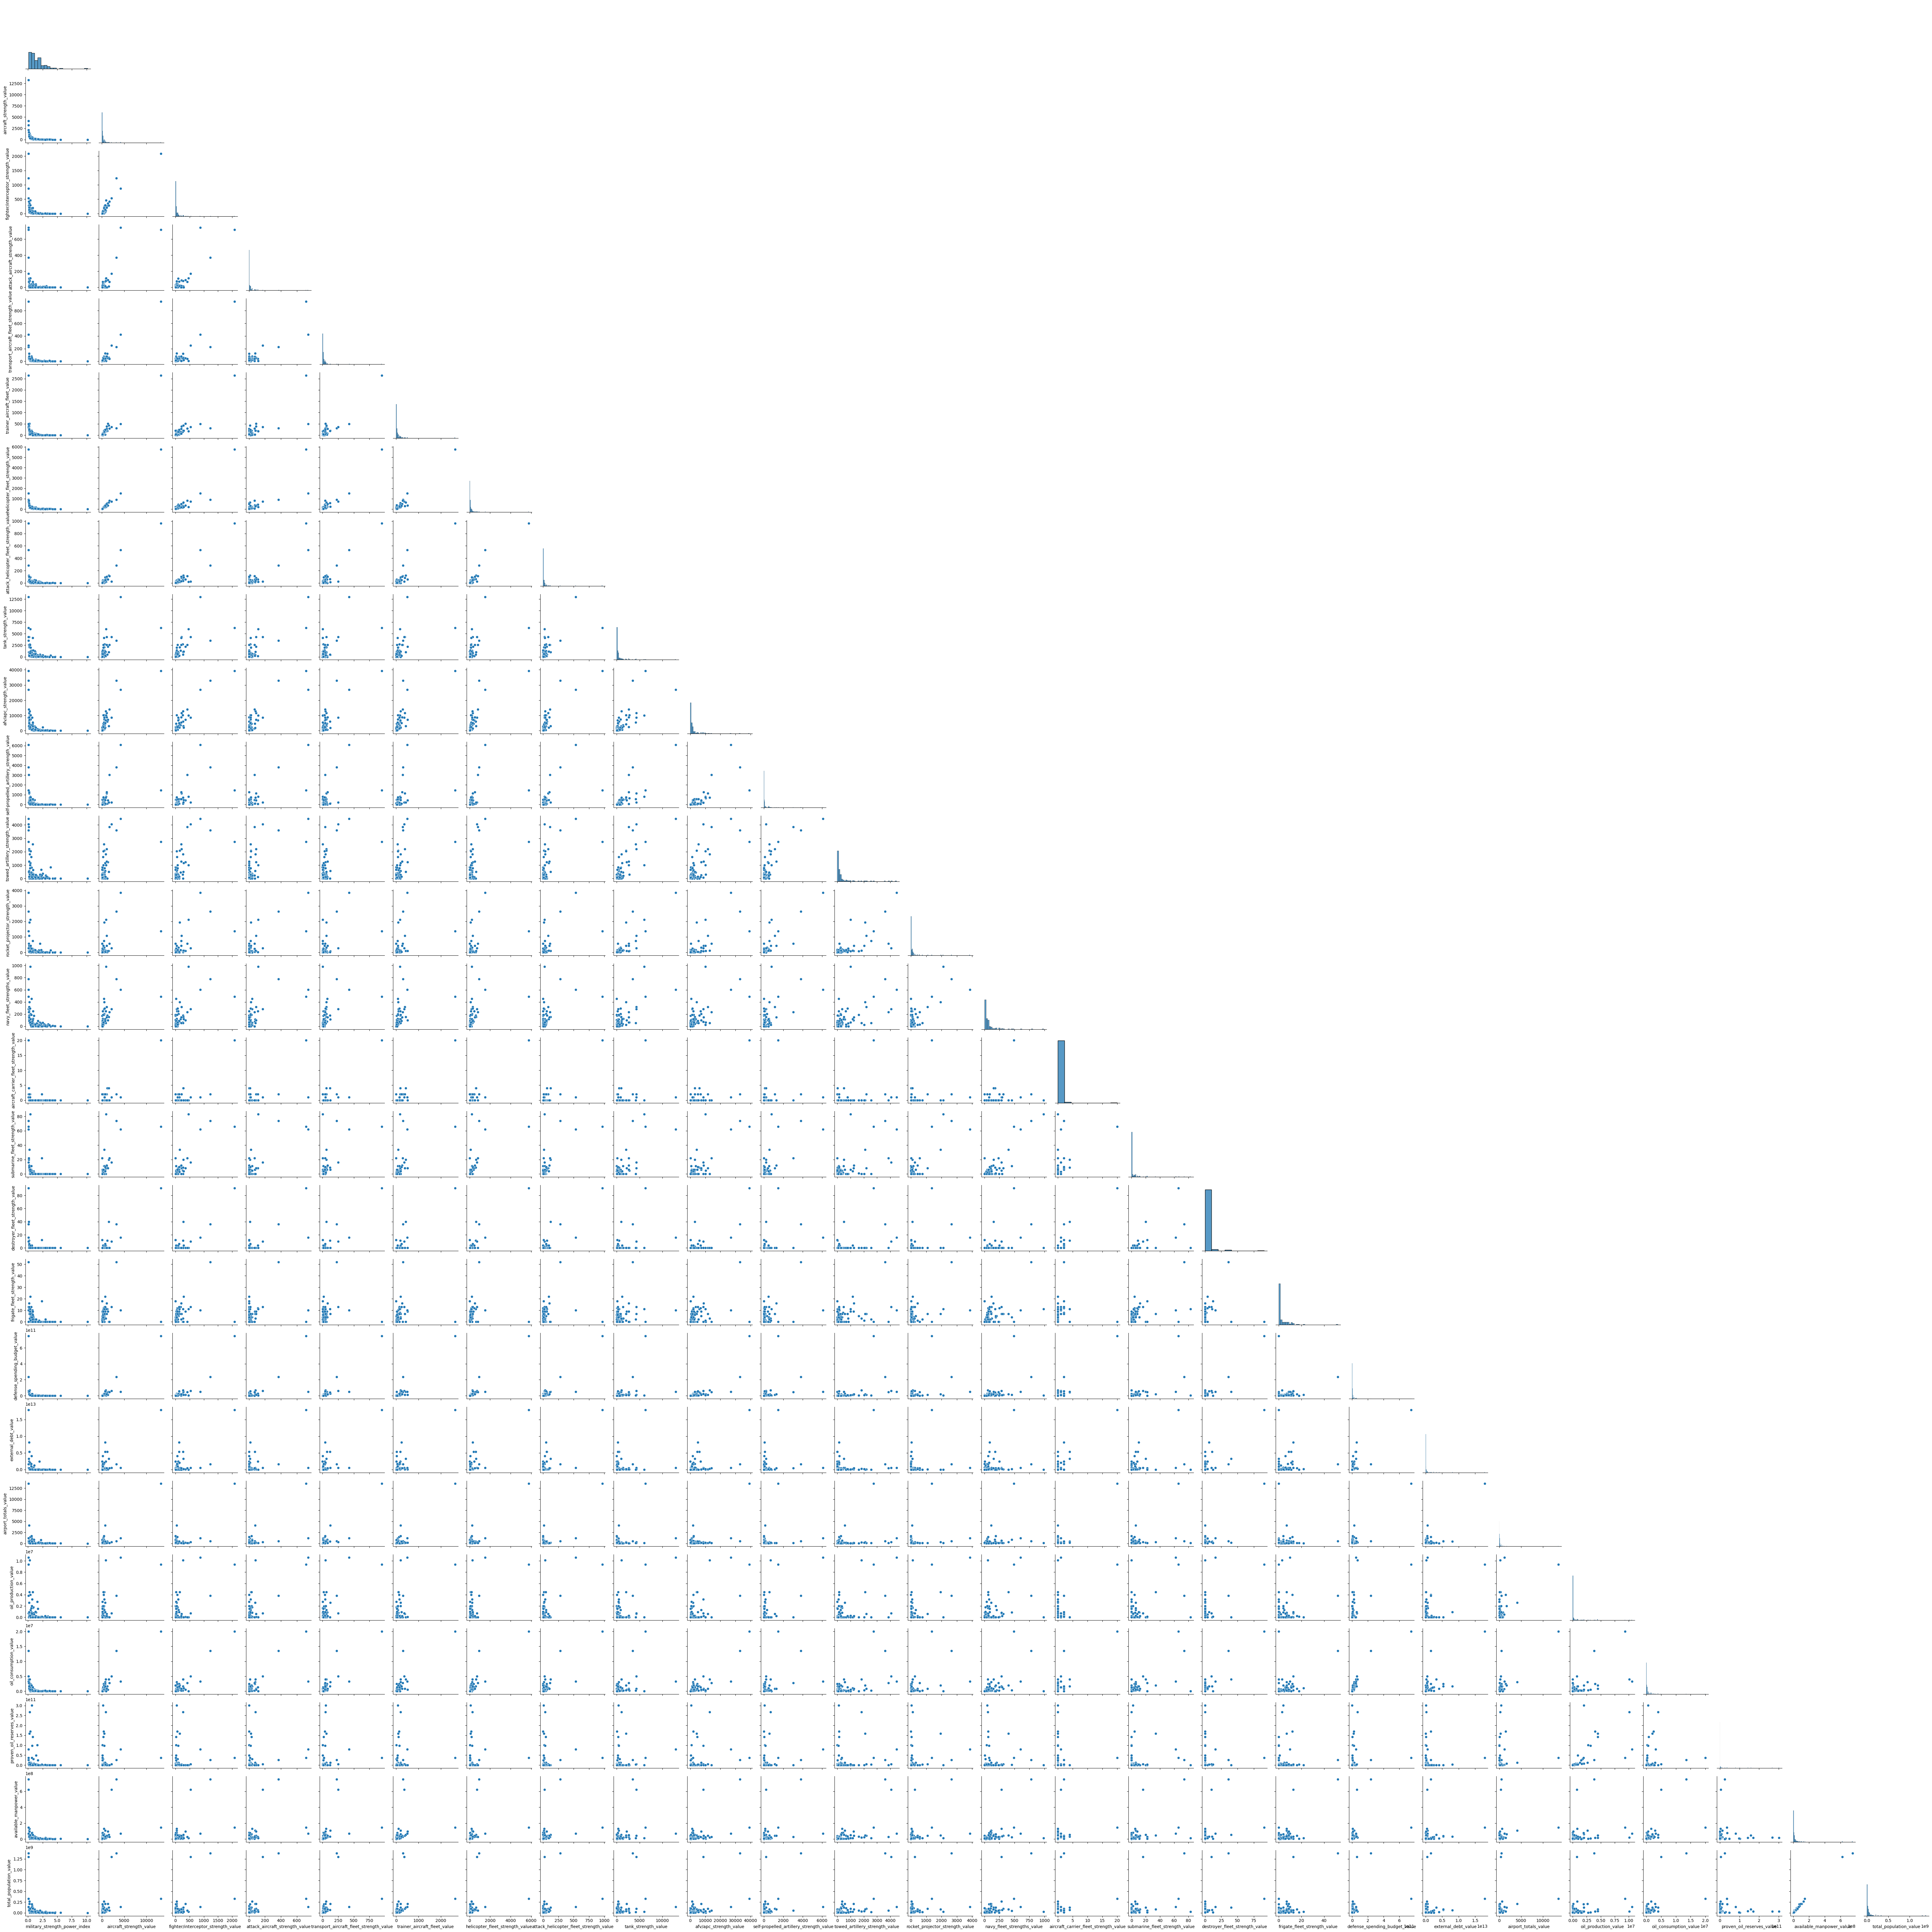

In [202]:
sns.pairplot(df, palette="inferno", corner=True);


In [204]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
military_strength_power_index,138.000,1.461,1.324,0.061,0.575,1.034,2.022,10.168
aircraft_strength_value,138.000,388.471,1231.982,0.000,33.000,111.000,290.250,13264.000
fighter/interceptor_strength_value,138.000,81.565,230.325,0.000,0.000,17.000,60.500,2085.000
attack_aircraft_strength_value,138.000,25.761,94.528,0.000,0.000,0.000,15.750,742.000
transport_aircraft_fleet_strength_value,138.000,30.232,92.330,0.000,3.000,9.000,26.000,945.000
trainer_aircraft_fleet_value,138.000,82.833,240.804,0.000,4.250,26.000,79.250,2643.000
helicopter_fleet_strength_value,138.000,154.065,520.184,0.000,15.250,44.000,126.750,5768.000
attack_helicopter_fleet_strength_value,138.000,25.623,97.326,0.000,0.000,2.000,17.750,967.000
tank_strength_value,138.000,646.565,1515.464,0.000,19.250,153.000,436.250,12950.000
afv/apc_strength_value,138.000,2485.696,5410.546,0.000,250.250,734.500,2000.000,39253.000


In [206]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, scale
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.cluster import KMeans

In [208]:
df1 = df.copy()


In [210]:
df1.reset_index(inplace=True)


In [212]:
df1.head(1)


,country,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value
0,Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000


In [220]:
X = df1.drop(["country"], axis = 1)

In [222]:
scaler = scale


In [224]:
X_scaled = pd.DataFrame(scaler(X))


In [226]:
X_scaled.head(1)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-0.088,-0.105,-0.355,-0.008,-0.003,-0.345,0.064,-0.264,-0.428,-0.264,-0.309,-0.272,-0.222,-0.544,-0.177,-0.328,-0.187,-0.486,-0.030,-0.281,-0.204,-0.353,-0.322,-0.280,-0.132,-0.111


In [228]:
X_scaled.shape


(138, 26)

In [230]:
K_means_model = KMeans(random_state = 101)


In [242]:
Kmodel = K_means_model.fit(X)

In [246]:
Ktahmin = Kmodel.predict(X)

In [258]:
xxx = X

In [254]:
xxx["cluster"] = Ktahmin

In [256]:
from sklearn.metrics import silhouette_score
silhouette_score(xxx,Ktahmin)

0.7766982062094218

In [260]:
from pyclustertend import hopkins

ModuleNotFoundError: No module named 'pyclustertend'

In [262]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'Elbow method')

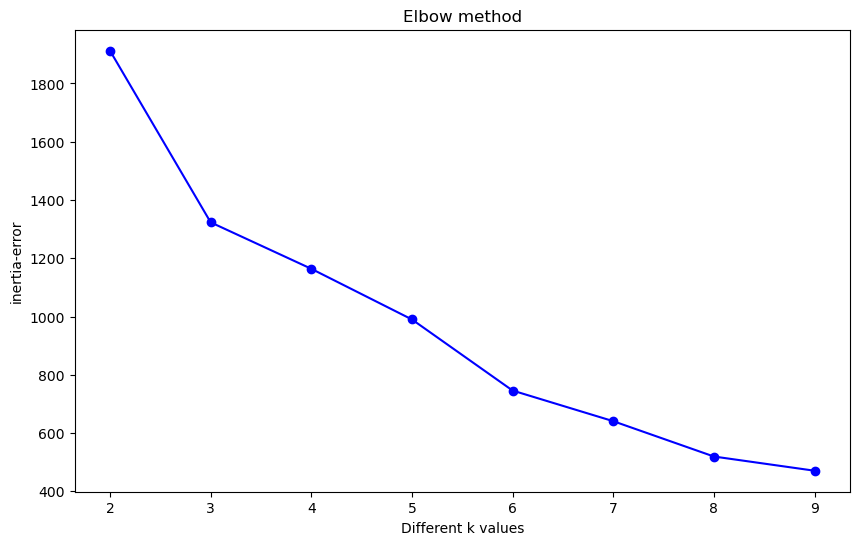

In [266]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("Elbow method") 

In [268]:
ssd

[1912.4595134431383,
 1323.442002352273,
 1163.9216193227612,
 990.0184405096197,
 745.994596215329,
 640.8885531461241,
 519.6051781633219,
 470.8511400065797]

In [270]:
pd.Series(ssd).diff()

0        NaN
1   -589.018
2   -159.520
3   -173.903
4   -244.024
5   -105.106
6   -121.283
7    -48.754
dtype: float64

In [272]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

,0
1,NaN
2,589.018
3,159.520
4,173.903
5,244.024
6,105.106
7,121.283
8,48.754


<Axes: >

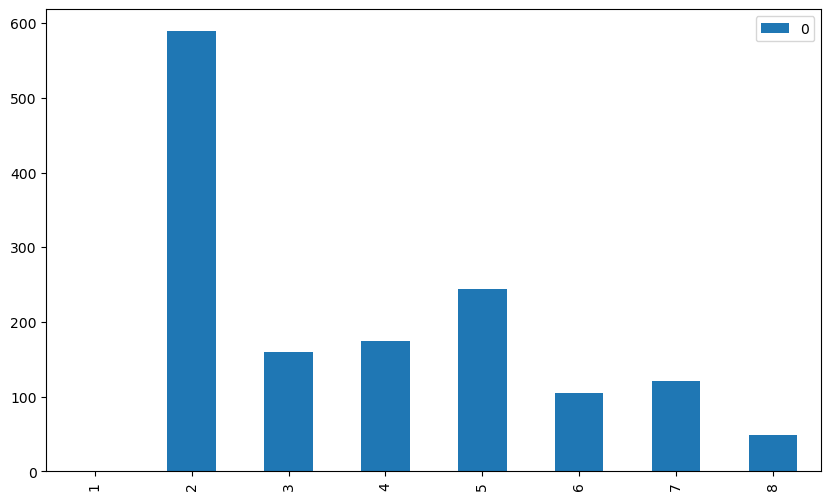

In [274]:
df1_diff.plot(kind='bar')

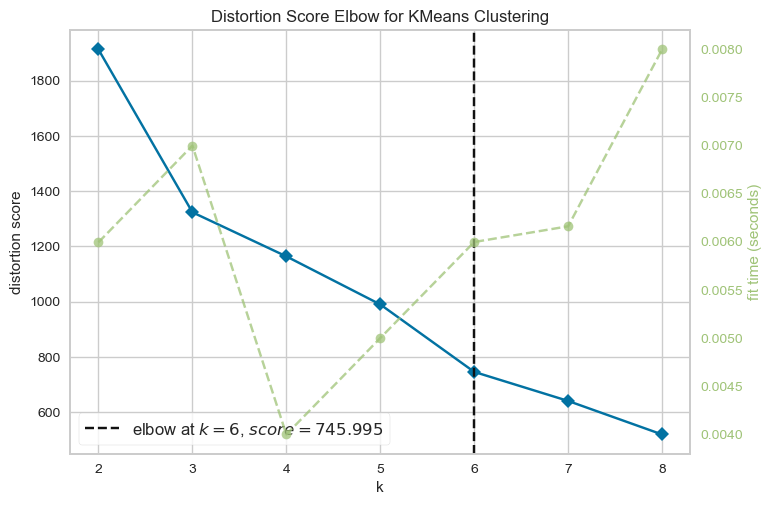

In [276]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

In [278]:
silhouette_score(X_scaled, K_means_model.labels_)


0.09852908081885725

In [280]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.8634670863948507
For n_clusters=3, the silhouette score is 0.8375286021969665
For n_clusters=4, the silhouette score is 0.8306243702885148
For n_clusters=5, the silhouette score is 0.749849508180191
For n_clusters=6, the silhouette score is 0.4849706459175927
For n_clusters=7, the silhouette score is 0.41324950510836345
For n_clusters=8, the silhouette score is 0.44616440862396434


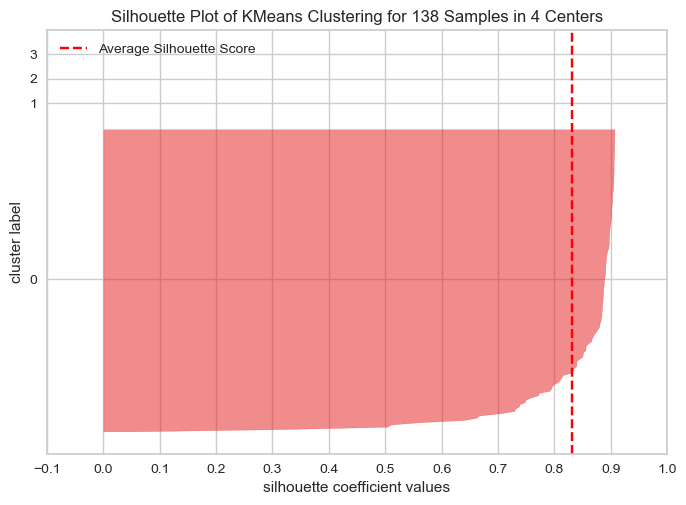

In [282]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=4, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [284]:
model = KMeans(n_clusters = 4, random_state = 101)
model.fit_predict(X_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0])

In [286]:
model.labels_


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0])

In [288]:
X["clusters"] = model.fit_predict(X_scaled)


In [290]:
X.head()


,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,cluster,clusters
0,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000,0,0
1,2.314,19,0,0,0,0,19,0,0,467,0,0,0,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4,16000.000,42500.000,168300000.000,1519438.000,3057220.000,0,0
2,0.466,551,103,22,59,87,257,45,880,7361,320,240,316,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,0,0
3,0.838,295,72,18,30,47,126,15,379,595,28,357,115,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,0,0
4,0.652,227,24,7,9,64,100,0,370,739,83,172,26,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,0,0


In [292]:
X.clusters.value_counts()


clusters
0    135
1      1
3      1
2      1
Name: count, dtype: int64

In [294]:
df1.head(1)


,country,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value
0,Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000


In [296]:
df1["predicted_clusters"] = model.fit_predict(X_scaled)


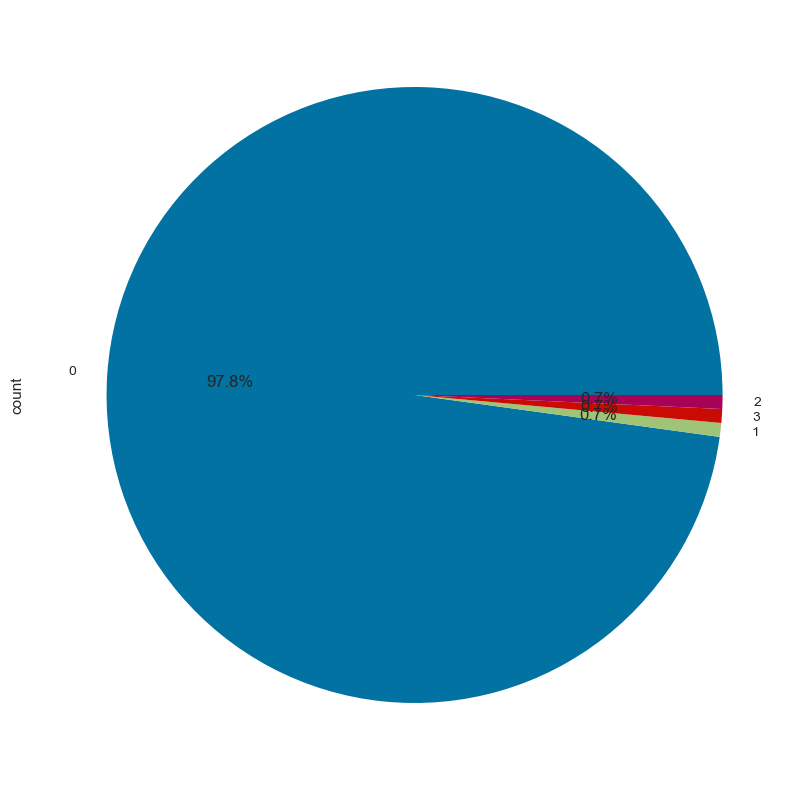

In [298]:
df1["predicted_clusters"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));


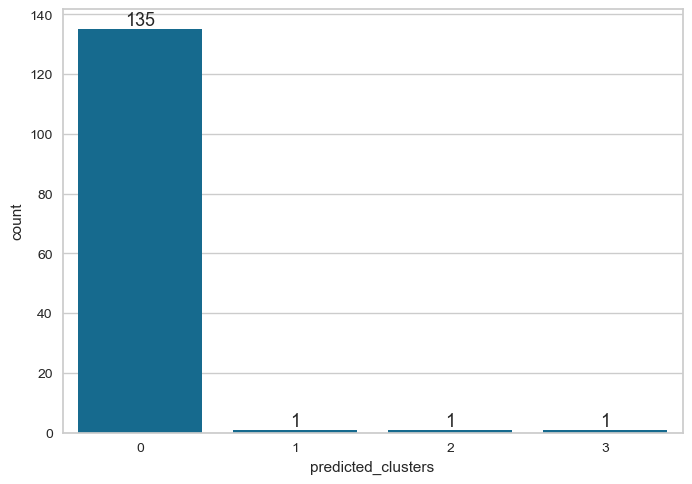

In [300]:
df1.predicted_clusters.value_counts()

sns.countplot(x=df1["predicted_clusters"], data=df1)
for index,value in enumerate(df1.predicted_clusters.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [302]:
df1[df1["predicted_clusters"]==0][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

,country,military_strength_power_index
49,India,0.095
57,Japan,0.150
110,South Korea,0.151
40,France,0.170
129,United Kingdom,0.172
...,...,...
104,Sierra Leone,4.206
115,Suriname,4.604
108,Somalia,4.640
66,Liberia,5.574


In [304]:
df1[df1["predicted_clusters"]==1][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

,country,military_strength_power_index
26,China,0.069


In [306]:
df1[df1["predicted_clusters"]==2][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")

,country,military_strength_power_index
130,United States,0.061


In [310]:
df1[df1["predicted_clusters"]==3][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")


,country,military_strength_power_index
101,Russia,0.068


In [312]:
df1['military_strength_power_index'].describe()


count   138.000
mean      1.461
std       1.324
min       0.061
25%       0.575
50%       1.034
75%       2.022
max      10.168
Name: military_strength_power_index, dtype: float64

In [314]:
df1['military_strength_power_index'].value_counts().index.sort_values()


Index([ 0.0606,  0.0681,  0.0691,  0.0953,  0.1501,  0.1509,  0.1702,  0.1717,
        0.1872,  0.1988,
       ...
        3.2889,  3.3736,  3.4433,  3.6537,  3.8586,  4.2063,  4.6042,  4.6404,
        5.5737, 10.1681],
      dtype='float64', name='military_strength_power_index', length=138)

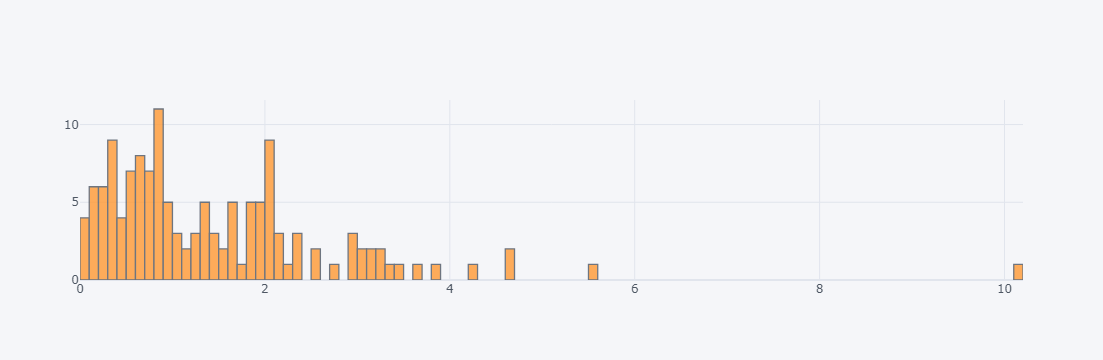

In [316]:
df1['military_strength_power_index'].iplot(kind='hist', bins=200)


In [318]:
def classification(military_strength_power_index):
    if military_strength_power_index <= 0.065:
        return 1
    elif 0.065 < military_strength_power_index <= 0.1:
        return 2
    elif 0.1 < military_strength_power_index <= 0.5:
        return 3
    else:
        return 0

In [320]:
df1['classification'] = df1['military_strength_power_index'].apply(classification)

In [322]:
df1.head(1)

,country,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,predicted_clusters,classification
0,Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000,0,0


In [324]:
df1['classification'].value_counts()

classification
0    109
3     25
2      3
1      1
Name: count, dtype: int64

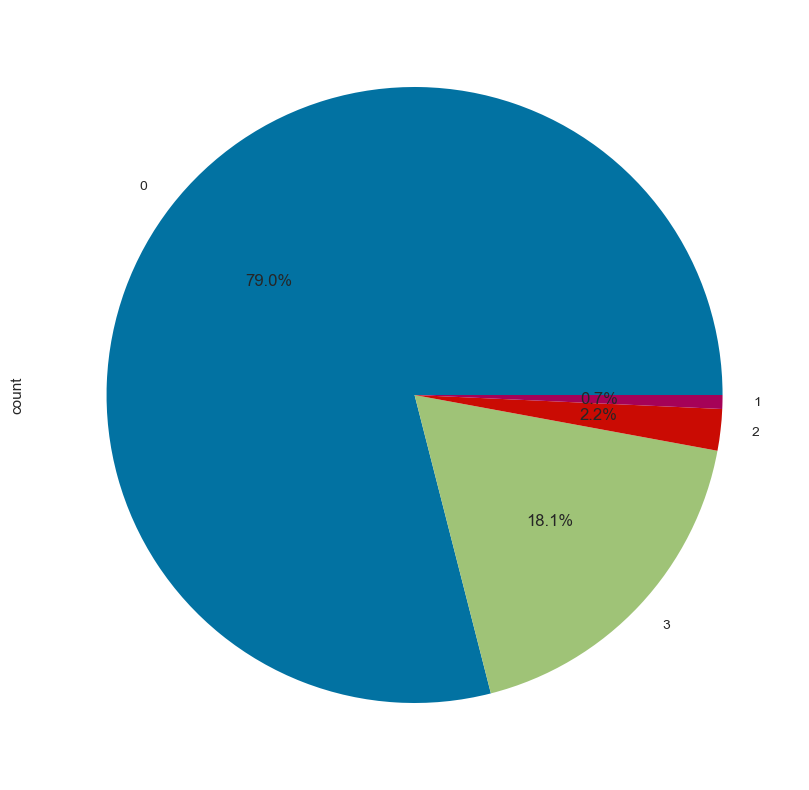

In [326]:
df1["classification"].value_counts().plot(kind="pie", startangle=0, labeldistance=1.1, autopct='%1.1f%%',figsize=(10,10));

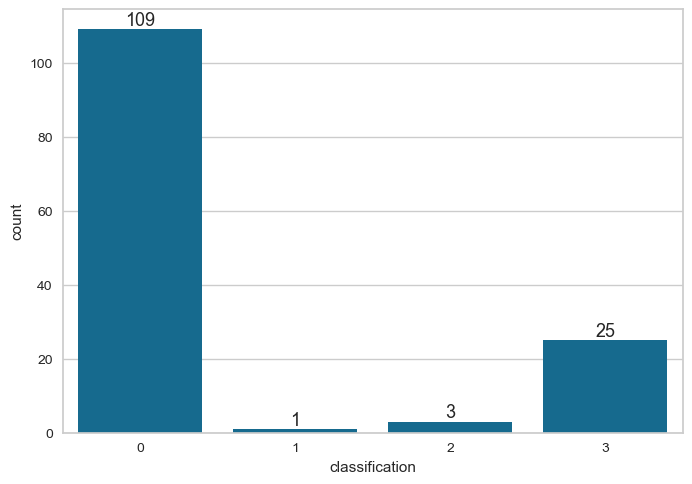

In [328]:
df1.classification.value_counts()

sns.countplot(x=df1["classification"], data=df1)
for index,value in enumerate(df1.classification.value_counts().sort_index()):
     plt.text(index, value, f"{value}", ha="center", va="bottom", fontsize = 13)

In [330]:
df1[df1["classification"]==2][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")


,country,military_strength_power_index
101,Russia,0.068
26,China,0.069
49,India,0.095


In [332]:
len(df1[df1["classification"]==2]["country"])


3

In [334]:
df1[df1["classification"]==1][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")


,country,military_strength_power_index
130,United States,0.061


In [336]:
len(df1[df1["classification"]==1]["country"])


1

In [338]:
df1[df1["classification"]==0][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")


,country,military_strength_power_index
117,Switzerland,0.526
89,Norway,0.528
116,Sweden,0.530
45,Greece,0.531
30,Czechia,0.553
...,...,...
104,Sierra Leone,4.206
115,Suriname,4.604
108,Somalia,4.640
66,Liberia,5.574


In [340]:
len(df1[df1["classification"]==0]["country"])


109

In [342]:
df1[df1["classification"]==3][["country", "military_strength_power_index"]].sort_values(by="military_strength_power_index")


,country,military_strength_power_index
57,Japan,0.150
110,South Korea,0.151
40,France,0.170
129,United Kingdom,0.172
35,Egypt,0.187
17,Brazil,0.199
124,Turkey,0.210
55,Italy,0.211
43,Germany,0.219
51,Iran,0.219


In [344]:
len(df1[df1["classification"]==3]["country"])


25

In [346]:
from sklearn.metrics import adjusted_rand_score


In [348]:
df1_end = df1
df1_end

,country,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value,predicted_clusters,classification
0,Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000,0,0
1,Albania,2.314,19,0,0,0,0,19,0,0,467,0,0,0,38.000,0.000,0.000,0.000,0.000,250000000.000,9505000000.000,4,16000.000,42500.000,168300000.000,1519438.000,3057220.000,0,0
2,Algeria,0.466,551,103,22,59,87,257,45,880,7361,320,240,316,201.000,0.000,6.000,0.000,5.000,13000000000.000,6260000000.000,157,1306000.000,325000.000,12200000000.000,20741263.000,41657488.000,0,3
3,Angola,0.838,295,72,18,30,47,126,15,379,595,28,357,115,57.000,0.000,0.000,0.000,0.000,7000000000.000,42080000000.000,176,1666000.000,82300.000,8273000000.000,6244205.000,30355880.000,0,0
4,Argentina,0.652,227,24,7,9,64,100,0,370,739,83,172,26,49.000,0.000,2.000,4.000,0.000,4200000000.000,214900000000.000,1138,479400.000,685000.000,2185000000.000,20179430.000,44694198.000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,0.645,260,38,0,52,82,86,10,390,600,73,104,36,49.000,0.000,2.000,0.000,4.000,745000000.000,100300000000.000,444,2007000.000,575000.000,300900000000.000,14260129.000,31689176.000,0,0
134,Vietnam,0.356,293,77,0,38,36,138,25,2615,2530,70,1000,85,65.000,0.000,6.000,0.000,9.000,5500000000.000,96580000000.000,45,271400.000,525000.000,4400000000.000,51043216.000,97040334.000,0,3
135,Yemen,1.241,169,77,0,8,21,61,14,620,615,20,85,150,30.000,0.000,0.000,0.000,0.000,1400000000.000,7068000000.000,57,12260.000,145000.000,3000000000.000,11266221.000,28667230.000,0,0
136,Zambia,1.646,108,18,0,11,52,27,0,75,184,0,42,50,0.000,0.000,0.000,0.000,0.000,40000000.000,11660000000.000,88,0.000,21000.000,0.000,6166905.000,16445079.000,0,0


In [350]:
df1.predicted_clusters.value_counts()


predicted_clusters
0    135
1      1
3      1
2      1
Name: count, dtype: int64

In [352]:
df1.classification.value_counts()


classification
0    109
3     25
2      3
1      1
Name: count, dtype: int64

In [354]:
df1[["classification", "predicted_clusters"]].value_counts()


classification  predicted_clusters
0               0                     109
3               0                      25
1               2                       1
2               0                       1
                1                       1
                3                       1
Name: count, dtype: int64

In [356]:
df1[["country", "classification", "predicted_clusters"]]


,country,classification,predicted_clusters
0,Afghanistan,0,0
1,Albania,0,0
2,Algeria,3,0
3,Angola,0,0
4,Argentina,0,0
...,...,...,...
133,Venezuela,0,0
134,Vietnam,3,0
135,Yemen,0,0
136,Zambia,0,0


In [358]:
df1[df1["classification"]!=df1["predicted_clusters"]][["country", "classification", "predicted_clusters"]]


,country,classification,predicted_clusters
2,Algeria,3,0
6,Australia,3,0
17,Brazil,3,0
22,Canada,3,0
26,China,2,1
35,Egypt,3,0
40,France,3,0
43,Germany,3,0
49,India,2,0
50,Indonesia,3,0


In [360]:
df2 = df.copy()


In [362]:
df2.head(1)


,military_strength_power_index,aircraft_strength_value,fighter/interceptor_strength_value,attack_aircraft_strength_value,transport_aircraft_fleet_strength_value,trainer_aircraft_fleet_value,helicopter_fleet_strength_value,attack_helicopter_fleet_strength_value,tank_strength_value,afv/apc_strength_value,self-propelled_artillery_strength_value,towed_artillery_strength_value,rocket_projector_strength_value,navy_fleet_strengths_value,aircraft_carrier_fleet_strength_value,submarine_fleet_strength_value,destroyer_fleet_strength_value,frigate_fleet_strength_value,defense_spending_budget_value,external_debt_value,airport_totals_value,oil_production_value,oil_consumption_value,proven_oil_reserves_value,available_manpower_value,total_population_value
country,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.344,260,0,25,30,0,187,0,0,1062,0,176,50,0.000,0.000,0.000,0.000,0.000,12000000000.000,2840000000.000,43,0.000,5500.000,0.000,14325743.000,34940837.000


In [364]:
X_scaled = scale(df2)


In [366]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,-0.088,-0.105,-0.355,-0.008,-0.003,-0.345,0.064,-0.264,-0.428,-0.264,-0.309,-0.272,-0.222,-0.544,-0.177,-0.328,-0.187,-0.486,-0.030,-0.281,-0.204,-0.353,-0.322,-0.280,-0.132,-0.111
1,0.647,-0.301,-0.355,-0.274,-0.329,-0.345,-0.261,-0.264,-0.428,-0.374,-0.309,-0.491,-0.325,-0.273,-0.177,-0.328,-0.187,-0.486,-0.205,-0.277,-0.237,-0.343,-0.305,-0.276,-0.284,-0.305
2,-0.754,0.132,0.093,-0.040,0.313,0.017,0.199,0.200,0.155,0.904,0.157,-0.192,0.330,0.888,-0.177,0.145,-0.187,0.342,-0.015,-0.279,-0.110,0.434,-0.174,0.006,-0.056,-0.070
3,-0.472,-0.076,-0.042,-0.082,-0.003,-0.149,-0.054,-0.110,-0.177,-0.351,-0.269,-0.046,-0.087,-0.138,-0.177,-0.328,-0.187,-0.486,-0.104,-0.259,-0.094,0.650,-0.287,-0.086,-0.228,-0.139
4,-0.613,-0.132,-0.251,-0.199,-0.231,-0.078,-0.104,-0.264,-0.183,-0.324,-0.188,-0.276,-0.271,-0.195,-0.177,-0.170,0.251,-0.486,-0.146,-0.165,0.702,-0.064,-0.008,-0.229,-0.063,-0.052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,-0.618,-0.105,-0.190,-0.274,0.237,-0.003,-0.131,-0.161,-0.170,-0.350,-0.203,-0.361,-0.251,-0.195,-0.177,-0.170,-0.187,0.177,-0.198,-0.228,0.127,0.856,-0.059,6.784,-0.133,-0.131
134,-0.837,-0.078,-0.020,-0.274,0.084,-0.195,-0.031,-0.006,1.304,0.008,-0.207,0.755,-0.149,-0.081,-0.177,0.145,-0.187,1.005,-0.127,-0.230,-0.203,-0.189,-0.082,-0.177,0.304,0.267
135,-0.166,-0.179,-0.020,-0.274,-0.242,-0.258,-0.180,-0.120,-0.018,-0.347,-0.280,-0.385,-0.014,-0.330,-0.177,-0.328,-0.187,-0.486,-0.188,-0.278,-0.193,-0.345,-0.258,-0.210,-0.168,-0.149
136,0.141,-0.228,-0.277,-0.274,-0.209,-0.129,-0.245,-0.264,-0.379,-0.427,-0.309,-0.438,-0.222,-0.544,-0.177,-0.328,-0.187,-0.486,-0.208,-0.276,-0.167,-0.353,-0.315,-0.280,-0.229,-0.223


In [368]:
from scipy.cluster.hierarchy import dendrogram, linkage


In [370]:
hc_ward = linkage(y = df2, method = "ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")

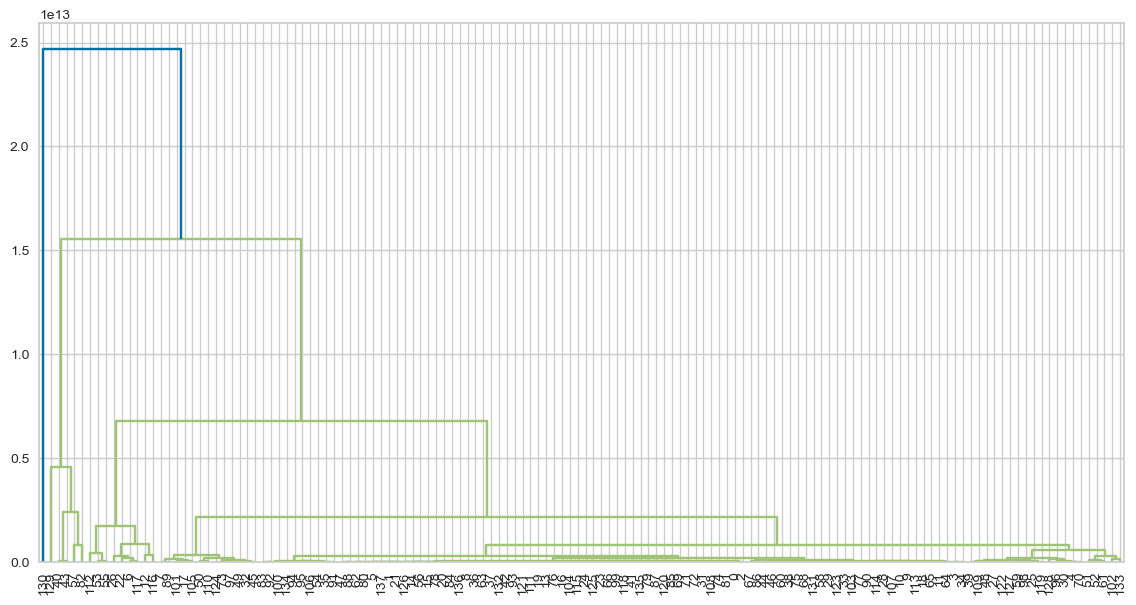

In [372]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward, leaf_font_size = 10);

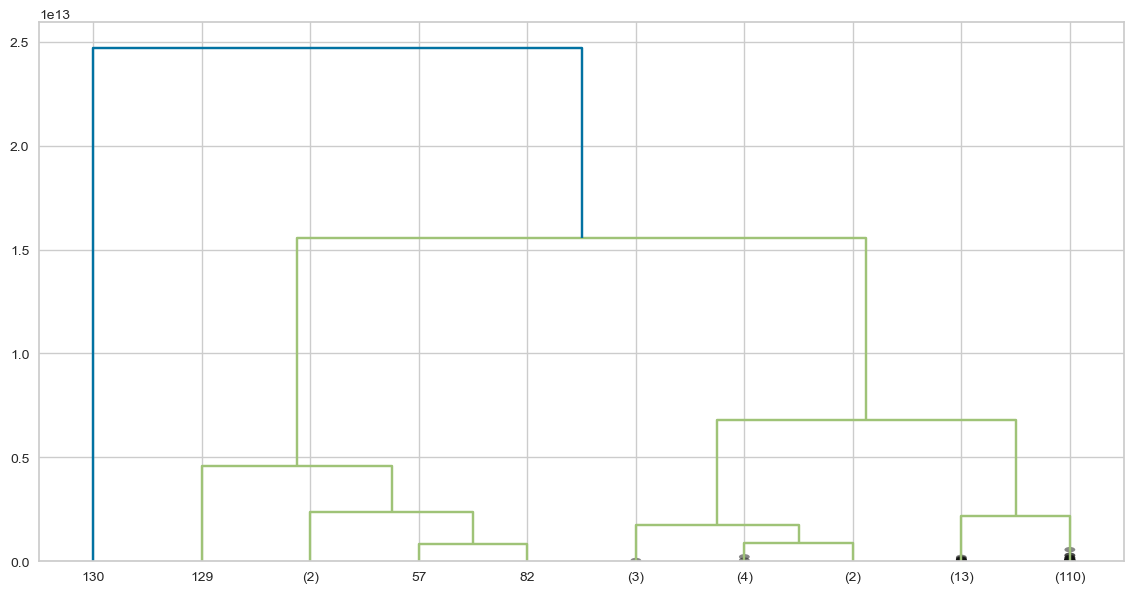

In [374]:
plt.figure(figsize = (14,7))
dendrogram(hc_ward,
           truncate_mode = "lastp",
           p = 10,
           show_contracted = True,
           leaf_font_size = 10);

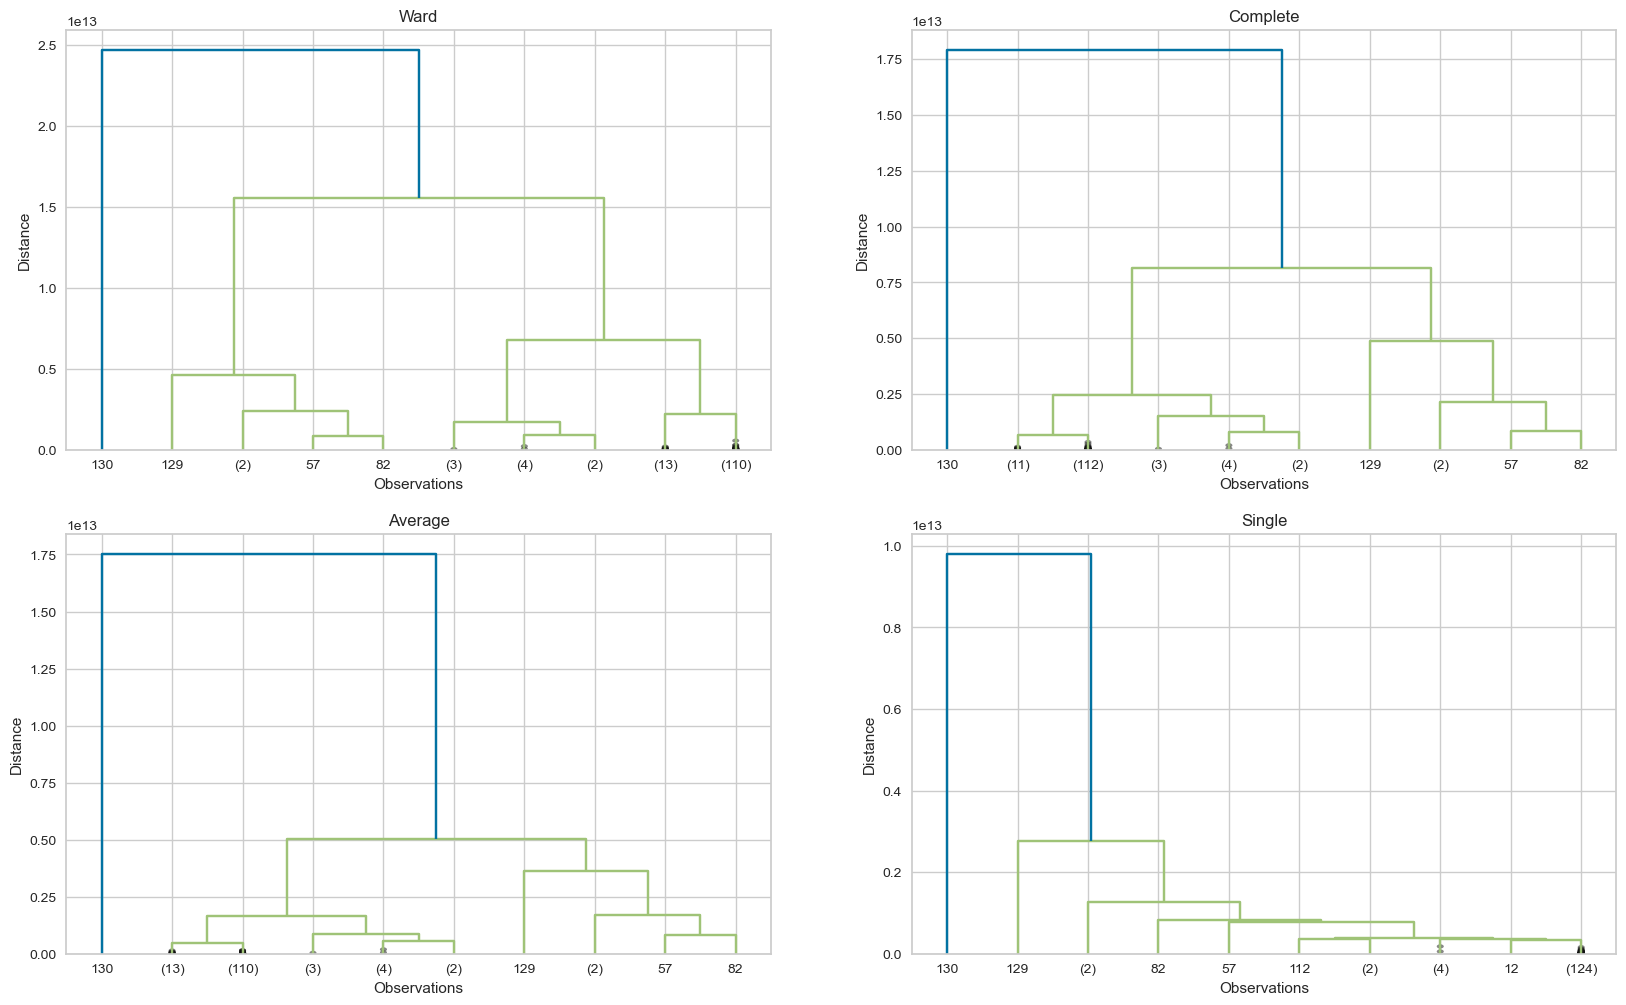

In [376]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

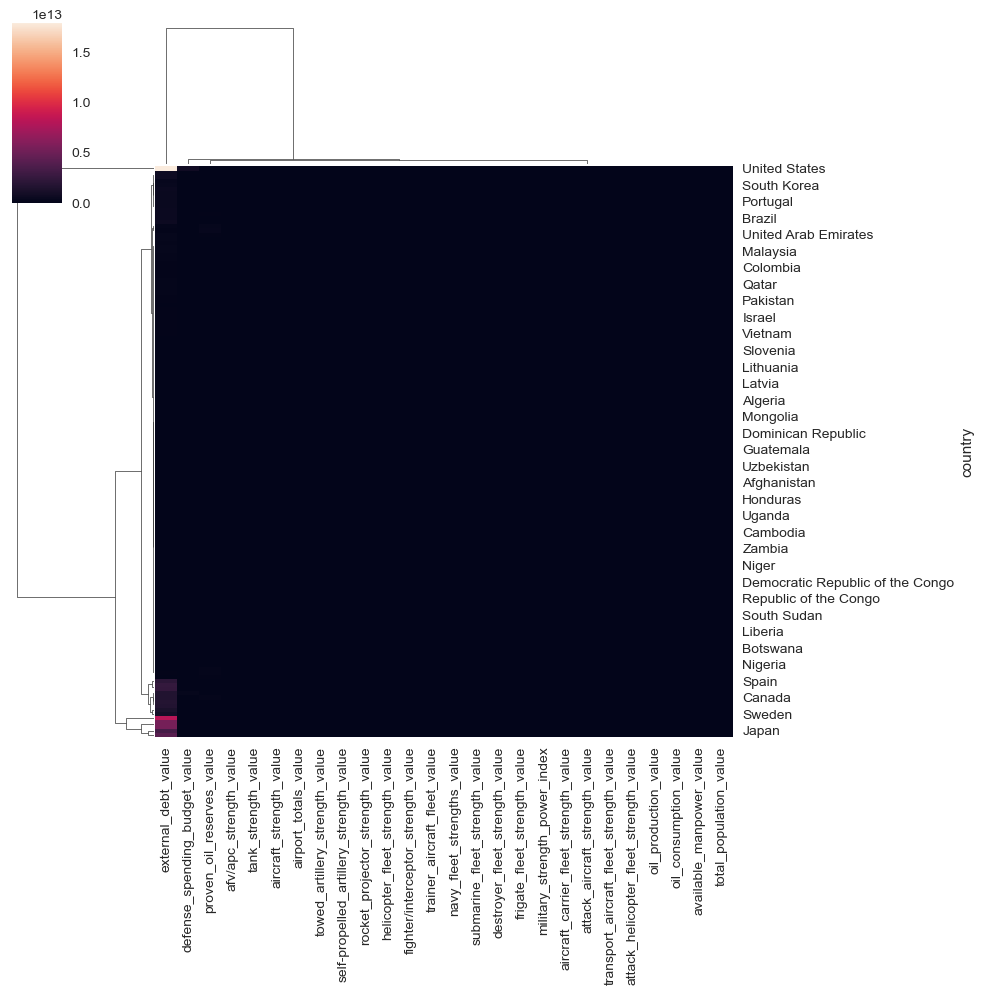

In [378]:
sns.clustermap(df2);

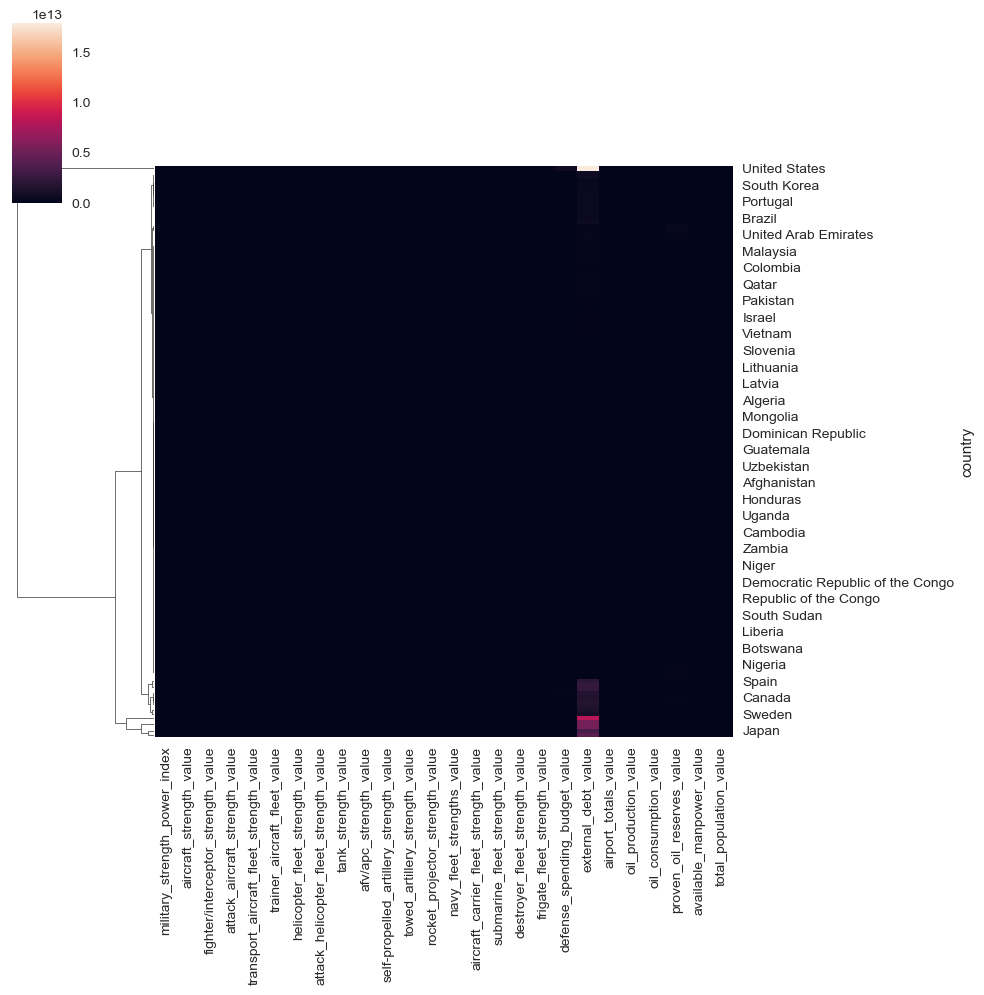

In [380]:
sns.clustermap(df2, col_cluster=False);


In [392]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering


In [396]:
model = AgglomerativeClustering(n_clusters=5, linkage='average')

In [398]:
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                     
                                    linkage='ward').fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model_labels)}')

Silhouette Score for 2 clusters: 0.8456213294492482
Silhouette Score for 3 clusters: 0.8179398928250695
Silhouette Score for 4 clusters: 0.8066499502450445
Silhouette Score for 5 clusters: 0.3360361846964219
Silhouette Score for 6 clusters: 0.3477528647879612
Silhouette Score for 7 clusters: 0.34606445750469234
Silhouette Score for 8 clusters: 0.34547619242443295
Silhouette Score for 9 clusters: 0.33252632112907066


In [400]:
clusters = model.fit_predict(X_scaled)

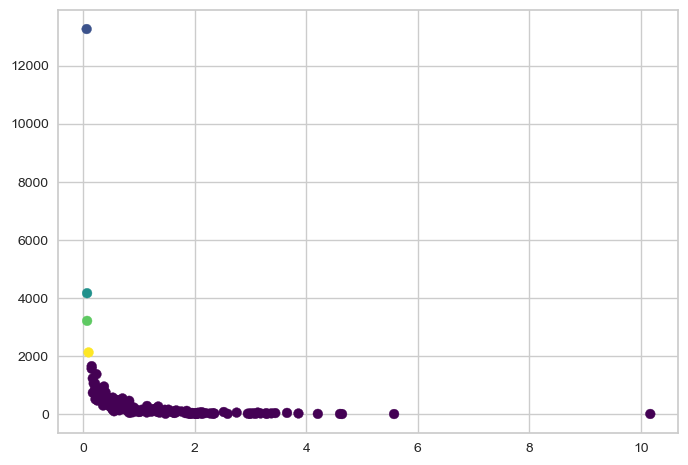

In [402]:
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = clusters, cmap = "viridis")
